In [2]:
import requests
import pandas as pd


In [2]:
#response = requests.get(f'https://api.weather.gov/points/{latitude},{longitude}').json()

In [3]:
import os
folder_path = 'data/'
files = os.listdir(folder_path)
for file in files:
    file_path = os.path.join(folder_path, file)
    os.remove(file_path)

In [4]:
def getweather(latitude, longitude,state):
    try:
        response = requests.get(f'http://api.weather.gov/points/{latitude},{longitude}').json()
        t = response["properties"]
        f = t["forecast"]
    
        response = requests.get(f).json()
        mid = response["properties"]["periods"]
    
        r = len(mid)
        df = pd.DataFrame(mid)
        df = df.drop('number', axis=1)
        df = df.drop('temperatureUnit', axis=1)
        df = df.drop('temperatureTrend', axis=1)
        df = df.drop('probabilityOfPrecipitation', axis=1)
        df = df.drop('dewpoint', axis=1)
        df = df.drop('relativeHumidity', axis=1)
        df = df.drop('icon', axis=1)
        s = "data/"+state+".csv"
    
        df.to_csv(s, index=False)
        return ("Done")
    except KeyError as e:
        return(e)

In [5]:
dfs = pd.read_excel("states.xlsx")
dfs

,State,Latitude,Longitude
0,Alabama,32.806671,-86.791130
1,Alaska,61.370716,-152.404419
2,Arizona,33.729759,-111.431221
3,Arkansas,34.969704,-92.373123
4,California,36.116203,-119.681564
5,Colorado,39.059811,-105.311104
6,Connecticut,41.597782,-72.755371
7,Delaware,39.318523,-75.507141
8,District of Columbia,38.897438,-77.026817
9,Florida,27.766279,-81.686783


In [6]:
for index, row in dfs.iterrows():
    state = row['State']
    latitude = row['Latitude']
    longitude = row['Longitude']
    print(getweather(latitude, longitude,state))

Done
'properties'
Done
Done
Done
Done
Done
Done
Done
Done
Done
'properties'
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
'properties'
Done
'properties'
Done
Done
Done
Done
Done
Done
Done
Done
Done


# Demo with one state

In [7]:
response = requests.get('http://api.weather.gov/points/32.806671,-86.791130').json()
t = response["properties"]
t

{'@id': 'https://api.weather.gov/points/32.8067,-86.7911',
 '@type': 'wx:Point',
 'cwa': 'BMX',
 'forecastOffice': 'https://api.weather.gov/offices/BMX',
 'gridId': 'BMX',
 'gridX': 62,
 'gridY': 53,
 'forecast': 'https://api.weather.gov/gridpoints/BMX/62,53/forecast',
 'forecastHourly': 'https://api.weather.gov/gridpoints/BMX/62,53/forecast/hourly',
 'forecastGridData': 'https://api.weather.gov/gridpoints/BMX/62,53',
 'observationStations': 'https://api.weather.gov/gridpoints/BMX/62,53/stations',
 'relativeLocation': {'type': 'Feature',
  'geometry': {'type': 'Point', 'coordinates': [-86.876651, 32.788282]},
  'properties': {'city': 'Maplesville',
   'state': 'AL',
   'distance': {'unitCode': 'wmoUnit:m', 'value': 8254.5041247304},
   'bearing': {'unitCode': 'wmoUnit:degree_(angle)', 'value': 75}}},
 'forecastZone': 'https://api.weather.gov/zones/forecast/ALZ035',
 'county': 'https://api.weather.gov/zones/county/ALC021',
 'fireWeatherZone': 'https://api.weather.gov/zones/fire/ALZ035',

In [8]:
f = t["forecast"]
response = requests.get(f).json()
response

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#'}],
 'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-86.7984859, 32.8188788],
    [-86.8001126, 32.7963031],
    [-86.77324580000001, 32.7949332],
    [-86.77161380000001, 32.817508700000005],
    [-86.7984859, 32.8188788]]]},
 'properties': {'updated': '2024-05-06T21:12:08+00:00',
  'units': 'us',
  'forecastGenerator': 'BaselineForecastGenerator',
  'generatedAt': '2024-05-06T21:14:24+00:00',
  'updateTime': '2024-05-06T21:12:08+00:00',
  'validTimes': '2024-05-06T15:00:00+00:00/P7DT10H',
  'elevation': {'unitCode': 'wmoUnit:m', 'value': 116.1288},
  'periods': [{'number': 1,
    'name': 'This Afternoon',
    'startTime': '2024-05-06T16:00:00-05:00',
    'endTime': '2024-05-06T1

In [9]:
mid = response["properties"]["periods"]

In [10]:
mid

[{'number': 1,
  'name': 'This Afternoon',
  'startTime': '2024-05-06T16:00:00-05:00',
  'endTime': '2024-05-06T18:00:00-05:00',
  'isDaytime': True,
  'temperature': 87,
  'temperatureUnit': 'F',
  'temperatureTrend': None,
  'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': 30},
  'dewpoint': {'unitCode': 'wmoUnit:degC', 'value': 19.444444444444443},
  'relativeHumidity': {'unitCode': 'wmoUnit:percent', 'value': 53},
  'windSpeed': '5 to 10 mph',
  'windDirection': 'S',
  'icon': 'https://api.weather.gov/icons/land/day/tsra_hi,30?size=medium',
  'shortForecast': 'Chance Showers And Thunderstorms',
  'detailedForecast': 'A chance of showers and thunderstorms. Mostly sunny, with a high near 87. South wind 5 to 10 mph. Chance of precipitation is 30%. New rainfall amounts less than a tenth of an inch possible.'},
 {'number': 2,
  'name': 'Tonight',
  'startTime': '2024-05-06T18:00:00-05:00',
  'endTime': '2024-05-07T06:00:00-05:00',
  'isDaytime': False,
  'temperatu

In [11]:
df = pd.DataFrame(mid)

In [12]:
df.head()

,number,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,probabilityOfPrecipitation,dewpoint,relativeHumidity,windSpeed,windDirection,icon,shortForecast,detailedForecast
0,1,This Afternoon,2024-05-06T16:00:00-05:00,2024-05-06T18:00:00-05:00,True,87,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 30}","{'unitCode': 'wmoUnit:degC', 'value': 19.44444...","{'unitCode': 'wmoUnit:percent', 'value': 53}",5 to 10 mph,S,https://api.weather.gov/icons/land/day/tsra_hi...,Chance Showers And Thunderstorms,A chance of showers and thunderstorms. Mostly ...
1,2,Tonight,2024-05-06T18:00:00-05:00,2024-05-07T06:00:00-05:00,False,66,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 30}","{'unitCode': 'wmoUnit:degC', 'value': 20.55555...","{'unitCode': 'wmoUnit:percent', 'value': 100}",5 mph,S,https://api.weather.gov/icons/land/night/tsra_...,Chance Showers And Thunderstorms then Partly C...,A chance of showers and thunderstorms before 1...
2,3,Tuesday,2024-05-07T06:00:00-05:00,2024-05-07T18:00:00-05:00,True,87,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 30}","{'unitCode': 'wmoUnit:degC', 'value': 21.66666...","{'unitCode': 'wmoUnit:percent', 'value': 100}",5 to 10 mph,S,https://api.weather.gov/icons/land/day/bkn/tsr...,Partly Sunny then Chance Showers And Thunderst...,A chance of showers and thunderstorms after 1p...
3,4,Tuesday Night,2024-05-07T18:00:00-05:00,2024-05-08T06:00:00-05:00,False,68,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 30}","{'unitCode': 'wmoUnit:degC', 'value': 21.66666...","{'unitCode': 'wmoUnit:percent', 'value': 100}",10 mph,S,https://api.weather.gov/icons/land/night/tsra_...,Chance Showers And Thunderstorms then Partly C...,A chance of showers and thunderstorms before 7...
4,5,Wednesday,2024-05-08T06:00:00-05:00,2024-05-08T18:00:00-05:00,True,90,F,None,"{'unitCode': 'wmoUnit:percent', 'value': None}","{'unitCode': 'wmoUnit:degC', 'value': 22.22222...","{'unitCode': 'wmoUnit:percent', 'value': 100}",5 to 10 mph,S,https://api.weather.gov/icons/land/day/bkn?siz...,Partly Sunny,"Partly sunny, with a high near 90. South wind ..."


# Data Discretization

In [13]:
import re

def extract_speed(text):
    numbers = re.findall(r'\d+', text)
    if len(numbers) == 1:
        return int(numbers[0])
    elif len(numbers) == 2:
        return (int(numbers[0]) + int(numbers[1])) / 2
    else:
        return None

In [14]:
h = []
def discret(s):
    for i in range(0,len(s)):
        j = s[i]
        if(j<10):
            h.append("low")
        elif(j>=10 and j<20):
            h.append("mediun")
        else:
            h.append("high")
    return h

In [15]:
import os
import pandas as pd
files = os.listdir("data/")

In [16]:
csv_files = [file for file in files if file.endswith('.csv')]

In [17]:
csv_files

['Georgia.csv',
 'North Carolina.csv',
 'Wyoming.csv',
 'New Hampshire.csv',
 'Wisconsin.csv',
 'Minnesota.csv',
 'Maryland.csv',
 'Pennsylvania.csv',
 'Texas.csv',
 'Florida.csv',
 'Michigan.csv',
 'Tennessee.csv',
 'District of Columbia.csv',
 'Arkansas.csv',
 'Ohio.csv',
 'Nebraska.csv',
 'Montana.csv',
 'Indiana.csv',
 'Mississippi.csv',
 'Connecticut.csv',
 'Oklahoma.csv',
 'Colorado.csv',
 'Maine.csv',
 'South Carolina.csv',
 'North Dakota.csv',
 'Louisiana.csv',
 'Utah.csv',
 'Virginia.csv',
 'New York.csv',
 'New Mexico.csv',
 'Delaware.csv',
 'Kentucky.csv',
 'Massachusetts.csv',
 'Alabama.csv',
 'Arizona.csv',
 'California.csv',
 'Nevada.csv',
 'Illinois.csv',
 'Idaho.csv',
 'Oregon.csv',
 'Iowa.csv',
 'Vermont.csv',
 'West Virginia.csv',
 'Kansas.csv',
 'New Jersey.csv',
 'Washington.csv',
 'Missouri.csv']

In [18]:
for i in range(0,len(csv_files)):
    state_name = csv_files[i].split('.')[0]
    file_path = os.path.join("data/",csv_files[i])
    
    l=[]
    h=[]
    df = pd.read_csv(file_path)
    l = df['windSpeed']
    s = []
    for r in range(0,len(l)):
        s.append(extract_speed(l[r]))
    h = discret(s)
    df['windSpeed'] = h
    file_path = 'data/'+state_name+'.csv'
    df.to_csv(file_path, index=False)

In [19]:
df = pd.read_csv("data/California.csv")

In [20]:
df.head()

,name,startTime,endTime,isDaytime,temperature,windSpeed,windDirection,shortForecast,detailedForecast
0,This Afternoon,2024-05-06T14:00:00-07:00,2024-05-06T18:00:00-07:00,True,72,mediun,NNW,Sunny,"Sunny, with a high near 72. North northwest wi..."
1,Tonight,2024-05-06T18:00:00-07:00,2024-05-07T06:00:00-07:00,False,46,low,NNW,Mostly Clear,"Mostly clear. Low around 46, with temperatures..."
2,Tuesday,2024-05-07T06:00:00-07:00,2024-05-07T18:00:00-07:00,True,76,mediun,NNW,Sunny,"Sunny, with a high near 76. North northwest wi..."
3,Tuesday Night,2024-05-07T18:00:00-07:00,2024-05-08T06:00:00-07:00,False,49,mediun,NW,Mostly Clear,"Mostly clear, with a low around 49. Northwest ..."
4,Wednesday,2024-05-08T06:00:00-07:00,2024-05-08T18:00:00-07:00,True,80,low,NW,Sunny,"Sunny, with a high near 80. Northwest wind 5 t..."


In [21]:
df = pd.read_csv("weather.csv")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5868 entries, 0 to 5867
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  5868 non-null   object 
 1   DATE     5868 non-null   int64  
 2   PRCP     5652 non-null   float64
 3   SNOW     5266 non-null   float64
 4   TMAX     5601 non-null   float64
 5   TSUN     1784 non-null   float64
 6   WSFG     1341 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 321.0+ KB


In [23]:
df.head()

,STATION,DATE,PRCP,SNOW,TMAX,TSUN,WSFG
0,USW00094846,1958,NaN,NaN,NaN,NaN,NaN
1,USW00094846,1959,32.26,39.1,58.1,NaN,NaN
2,USW00094846,1960,28.25,38.5,57.1,NaN,NaN
3,USW00094846,1961,36.81,31.5,58.3,NaN,NaN
4,USW00094846,1962,21.80,37.7,57.8,NaN,NaN


In [24]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 STATION       0
DATE          0
PRCP        216
SNOW        602
TMAX        267
TSUN       4084
WSFG       4527
dtype: int64


In [25]:
df.drop(columns=['TSUN','WSFG'], inplace=True)

In [26]:
df.fillna(0, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5868 entries, 0 to 5867
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  5868 non-null   object 
 1   DATE     5868 non-null   int64  
 2   PRCP     5868 non-null   float64
 3   SNOW     5868 non-null   float64
 4   TMAX     5868 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 229.3+ KB


In [28]:
filtered_data = df[df['DATE'] >= 1970]

In [29]:
filtered_data.head()

,STATION,DATE,PRCP,SNOW,TMAX
12,USW00094846,1970,43.43,38.0,58.6
13,USW00094846,1971,27.59,21.7,60.5
14,USW00094846,1972,45.51,47.8,56.0
15,USW00094846,1973,38.15,32.3,59.8
16,USW00094846,1974,35.41,29.0,58.2


In [30]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3668 entries, 12 to 5867
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  3668 non-null   object 
 1   DATE     3668 non-null   int64  
 2   PRCP     3668 non-null   float64
 3   SNOW     3668 non-null   float64
 4   TMAX     3668 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 171.9+ KB


In [34]:
df = df.sort_values(by='DATE')
df.head()

,STATION,DATE,PRCP,SNOW,TMAX
3481,USW00024128,1878,6.79,8.5,64.0
3482,USW00024128,1879,9.37,47.1,63.8
3483,USW00024128,1880,6.56,44.0,0.0
3484,USW00024128,1881,11.86,29.4,63.1
3485,USW00024128,1882,10.47,41.1,60.6


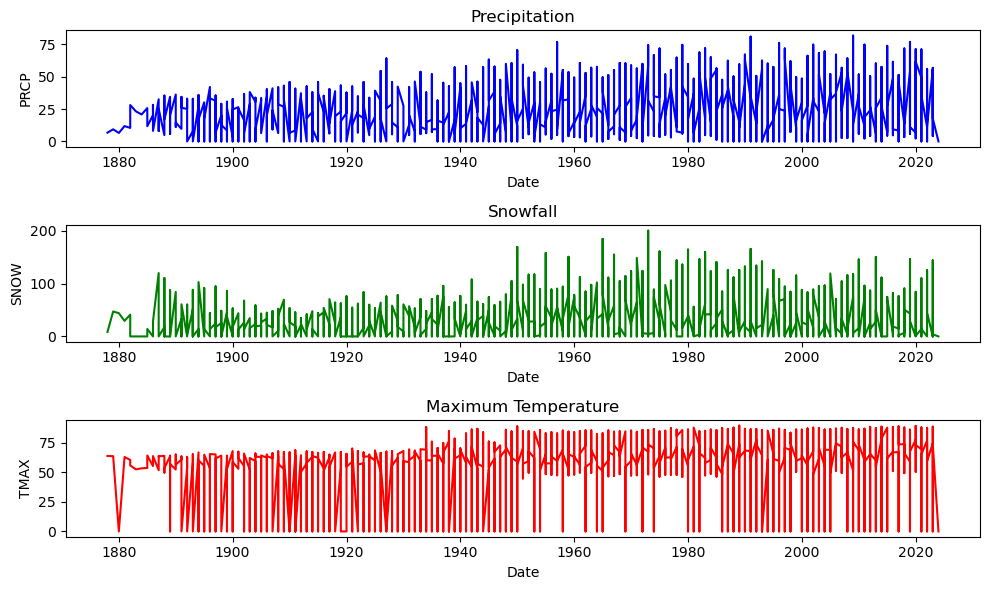

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(10, 6))

# Plot precipitation
plt.subplot(3, 1, 1)
plt.plot(df['DATE'], df['PRCP'], color='blue')
plt.title('Precipitation')
plt.xlabel('Date')
plt.ylabel('PRCP')

# Plot snowfall
plt.subplot(3, 1, 2)
plt.plot(df['DATE'], df['SNOW'], color='green')
plt.title('Snowfall')
plt.xlabel('Date')
plt.ylabel('SNOW')

# Plot maximum temperature
plt.subplot(3, 1, 3)
plt.plot(df['DATE'], df['TMAX'], color='red')
plt.title('Maximum Temperature')
plt.xlabel('Date')
plt.ylabel('TMAX')

plt.tight_layout()
plt.show()

/var/folders/tz/3gc62l0518x3dtgsh9grl8540000gn/T/ipykernel_64675/3858961343.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


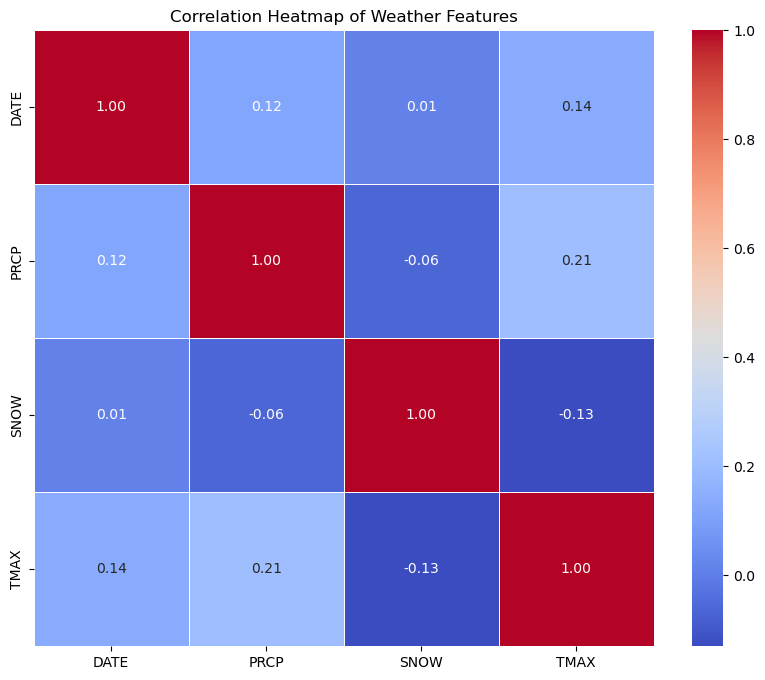

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the weather data
# Compute the correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Weather Features')
plt.show()

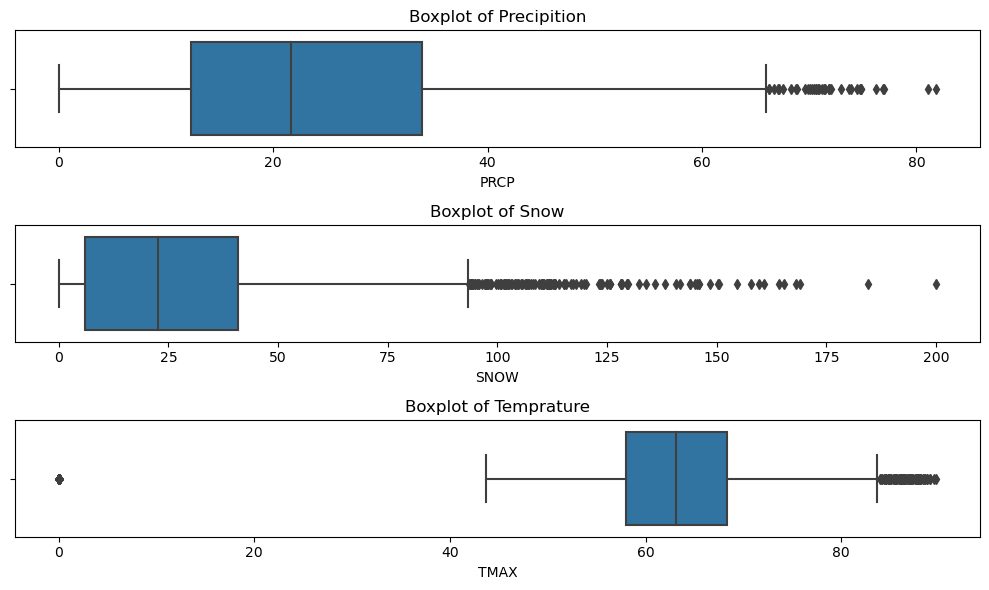

In [53]:
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
sns.boxplot(data=df, x='PRCP')
plt.title('Boxplot of Precipition')

plt.subplot(3, 1, 2)
sns.boxplot(data=df, x='SNOW')
plt.title('Boxplot of Snow')

plt.subplot(3, 1, 3)
sns.boxplot(data=df, x='TMAX')
plt.title('Boxplot of Temprature')


plt.tight_layout()
plt.show()

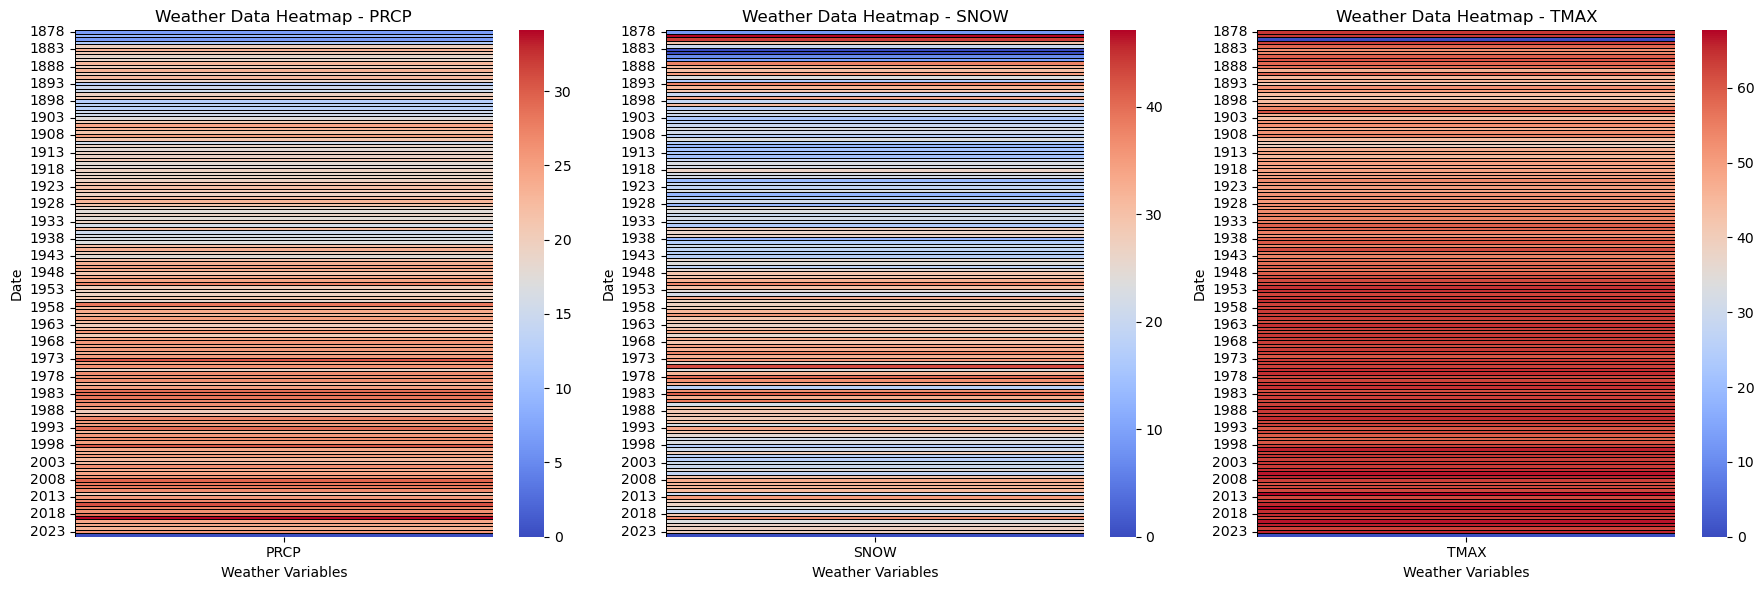

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_sorted is your sorted DataFrame containing the weather data

# Create a pivot table with DATE as index and columns as weather variables
pivot_tables = {}

variables = ['PRCP', 'SNOW', 'TMAX']

for variable in variables:
    pivot_tables[variable] = df_sorted.pivot_table(index='DATE', columns=None, values=[variable])

# Plot heatmaps using subplots
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(18, 6))

for i, variable in enumerate(variables):
    sns.heatmap(pivot_tables[variable], cmap='coolwarm', linewidths=0.5, linecolor='black', ax=axes[i])
    axes[i].set_title(f'Weather Data Heatmap - {variable}')
    axes[i].set_xlabel('Weather Variables')
    axes[i].set_ylabel('Date')

plt.tight_layout()
plt.show()


In [56]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame containing the weather data
selected_cols = ['PRCP', 'SNOW', 'TMAX']  # Specify the columns you want to normalize

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the selected columns
df_normalized = df.copy()  # Make a copy of the DataFrame to avoid modifying the original data
df_normalized[selected_cols] = scaler.fit_transform(df[selected_cols])

# Now df_normalized contains the normalized values for the selected columns
print(df_normalized.head())


          STATION  DATE      PRCP    SNOW      TMAX
3481  USW00024128  1878  0.082967  0.0425  0.713489
3482  USW00024128  1879  0.114492  0.2355  0.711260
3483  USW00024128  1880  0.080156  0.2200  0.000000
3484  USW00024128  1881  0.144917  0.1470  0.703456
3485  USW00024128  1882  0.127933  0.2055  0.675585


In [59]:
df_normalized.head()

,STATION,DATE,PRCP,SNOW,TMAX
3481,USW00024128,1878,0.082967,0.0425,0.713489
3482,USW00024128,1879,0.114492,0.2355,0.711260
3483,USW00024128,1880,0.080156,0.2200,0.000000
3484,USW00024128,1881,0.144917,0.1470,0.703456
3485,USW00024128,1882,0.127933,0.2055,0.675585


In [60]:
# Assuming df is your DataFrame containing the weather data
selected_cols = ['PRCP', 'SNOW', 'TMAX']  # Specify the columns you want to remove outliers from

# Function to remove outliers based on IQR
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Remove outliers for selected columns
df_cleaned = df.copy()  # Make a copy of the DataFrame to avoid modifying the original data
for col in selected_cols:
    df_cleaned = remove_outliers(df_cleaned, col)

# Now df_cleaned contains the DataFrame with outliers removed for the selected columns
print(df_cleaned.head())


          STATION  DATE   PRCP  SNOW  TMAX
3481  USW00024128  1878   6.79   8.5  64.0
3482  USW00024128  1879   9.37  47.1  63.8
3484  USW00024128  1881  11.86  29.4  63.1
3485  USW00024128  1882  10.47  41.1  60.6
1923  USW00014936  1882  28.15   0.0  55.9


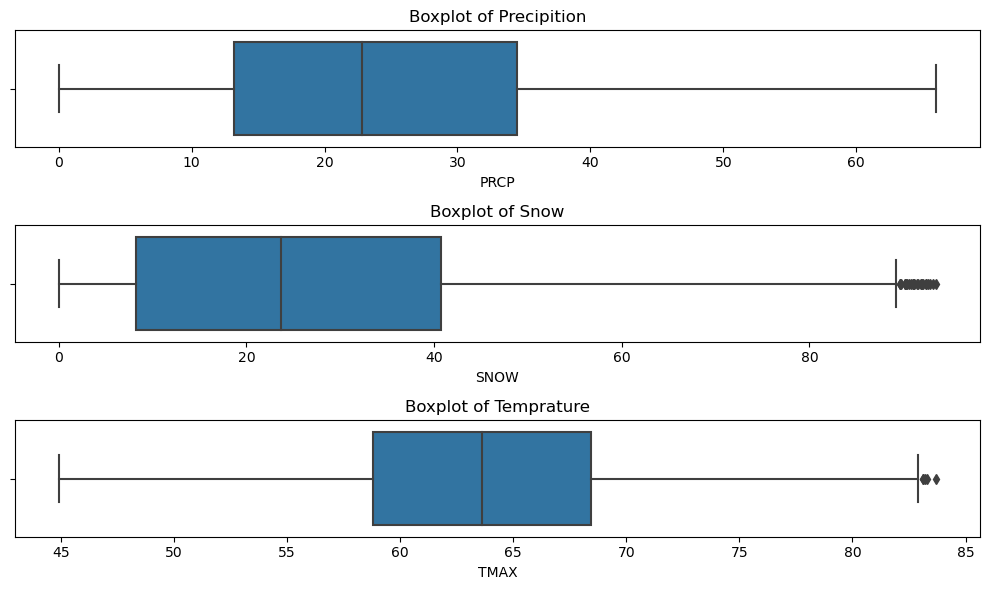

In [61]:
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
sns.boxplot(data=df_cleaned, x='PRCP')
plt.title('Boxplot of Precipition')

plt.subplot(3, 1, 2)
sns.boxplot(data=df_cleaned, x='SNOW')
plt.title('Boxplot of Snow')

plt.subplot(3, 1, 3)
sns.boxplot(data=df_cleaned, x='TMAX')
plt.title('Boxplot of Temprature')


plt.tight_layout()
plt.show()

In [3]:
df = pd.read_csv("weather.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5868 entries, 0 to 5867
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  5868 non-null   object 
 1   DATE     5868 non-null   int64  
 2   PRCP     5652 non-null   float64
 3   SNOW     5266 non-null   float64
 4   TMAX     5601 non-null   float64
 5   TSUN     1784 non-null   float64
 6   WSFG     1341 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 321.0+ KB


NameError: name 'sns' is not defined

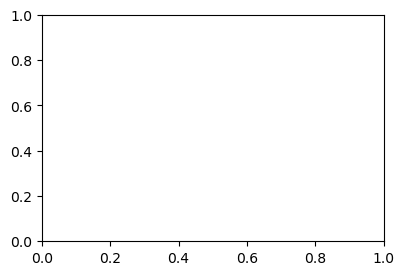

In [6]:
import matplotlib.pyplot as plt
non_null_columns = df.columns[df.notnull().any()].tolist()

# Plot histograms for non-null columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(non_null_columns):
    plt.subplot(3, 3, i + 1)  # Adjust the subplot arrangement as needed
    sns.histplot(df[column].dropna(), bins=20, kde=True)  # Plot histogram for non-null values
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()